In [1]:
import warnings

import numpy as np

warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import matplotlib as mpl

# 한글 폰트를 사용할 때 마이너스 부호가 깨져 보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False
% matplotlib inline

In [3]:
data = np.random.randint(-100, 100, 50).cumsum()
data

array([  28,  104,  123,  101,   39,  105,  111,   94,   20,  118,  164,
        140,  188,  195,   97,    7,   14,  -13,  -15,   45,  -23,  -47,
       -102,  -22,  -18, -112,  -97, -136,  -95, -153, -235, -140, -176,
       -187, -269, -211, -197, -132,  -71,    2,  -95,    2,   52,  102,
        195,  249,  256,  177,  171,  200])

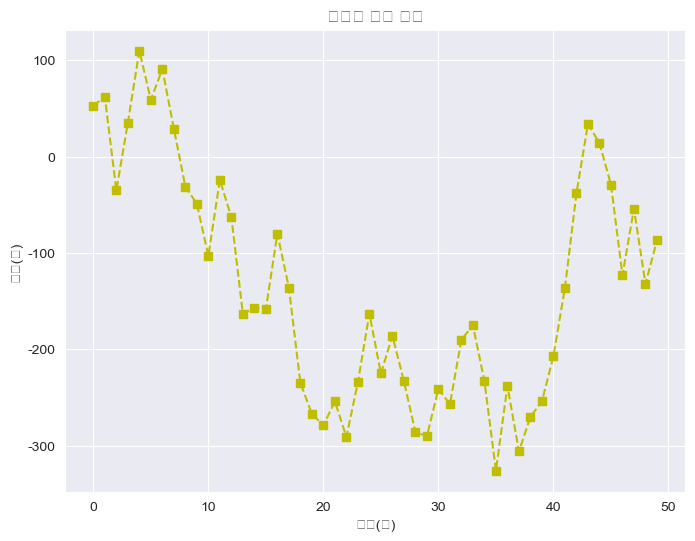

In [4]:
# plt.figure(figsize=(8, 6))
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(range(50), data, linestyle='--', marker='s', color='y')
plt.title('시간별 가격 추이')  # 차트 제목
plt.xlabel('시간(분)')
plt.ylabel('주가(원)')
plt.show()

폰트 설정에 앞서 설치된 matplotlib의 버전과 설치된 위치 정보를 확인한다.

In [5]:
print('버전:', mpl.__version__)
print('설치 위치:', mpl.__file__)
print('설정 정보 위치:', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

버전: 3.5.2
설치 위치: /opt/homebrew/anaconda3/lib/python3.9/site-packages/matplotlib/__init__.py
설정 정보 위치: /Users/kyle/.matplotlib
캐시 위치: /Users/kyle/.matplotlib


설정 파일의 위치를 확인한다.

In [6]:
print('설정 파일 위치:', mpl.matplotlib_fname())

설정 파일 위치: /opt/homebrew/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


컴퓨터에 설치된 폰트 목록을 얻어온다.

In [7]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

419
['/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', '/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', '/System/Library/Fonts/Avenir.ttc', '/System/Library/Fonts/Supplemental/Farah.ttc', '/System/Library/Fonts/NotoSerifMyanmar.ttc', '/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf', '/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', '/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', '/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', '/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf']


In [8]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
print(f[:10])

453
['STIXSizeOneSym', 'DejaVu Serif', 'STIXSizeOneSym', 'cmr10', 'STIXSizeTwoSym', 'cmtt10', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXGeneral', 'DejaVu Sans Mono']


나눔 글꼴을 사용할 것이므로 폰트 이름에 'Nanum'이 포함된 폰트만 가져온다.

In [9]:
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list[:10]
# 만약 실행 결과가 []만 나오거나 설치한 폰트가 보이지 않는다면 캐시 폴더로 이동해 폴더의 모든 내용을 삭제한 후 다시 실행하면 된다.

[('NanumGothicCoding', '/Users/kyle/Library/Fonts/NanumGothicCoding.ttf'),
 ('Nanum Myeongjo',
  '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/70816a43827731d40efe234b94feba96db91024f.asset/AssetData/NanumMyeongjo.ttc'),
 ('Nanum Brush Script',
  '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/6f4c91728bb824d6960725ec479c355eab7eeba8.asset/AssetData/NanumScript.ttc'),
 ('Nanum Gothic',
  '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc')]

In [10]:
# mpl.font_manager._rebuild()

# 한글 폰트 사용 설정 방법 3가지
1. FontProperties: 항목 단위
2. rcParams[]: 파일 단위
3.

1. FontProperties 사용: 그래프의 폰트가 필요한 항목마다 지정해야 한다.

In [11]:
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고, 지정한 항목에만 해당 폰트가 적용된다.
# matplot.pyplot → title(), xlabel(), ylabel(), legend(), text()
# matplot.axe → set_title()

font = '/Users/kyle/Library/Fonts/NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=15)

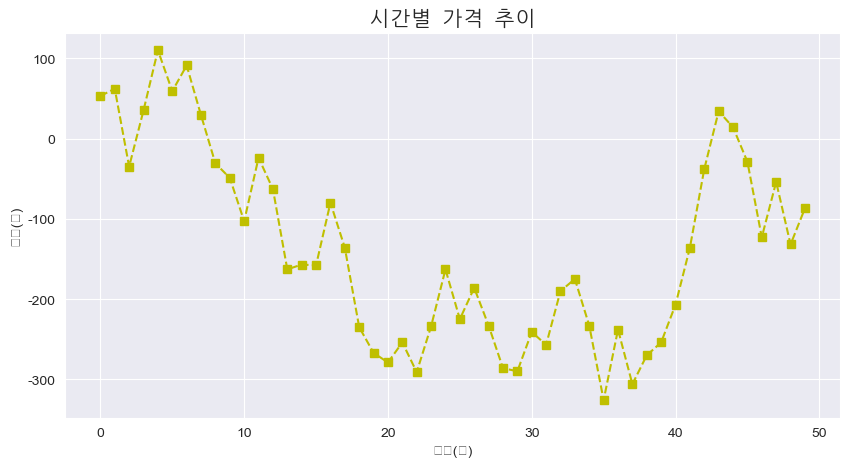

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(50), data, linestyle='--', marker='s', color='y')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.xlabel('시간(분)')
plt.ylabel('주가(원)')
plt.show()

2. matplotlib 라이브러리의 rcParams[]로 전역 글꼴 설정: 그래프의 폰트가 필요한 파일마다 지정해야 한다.

In [13]:
# 기본 설정 읽기
print('기본 설정 폰트:', plt.rcParams['font.family'])
print('기본 설정 폰트 크기:', plt.rcParams['font.size'])

기본 설정 폰트: ['sans-serif']
기본 설정 폰트 크기: 10.0


In [14]:
# 2-1
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15.0

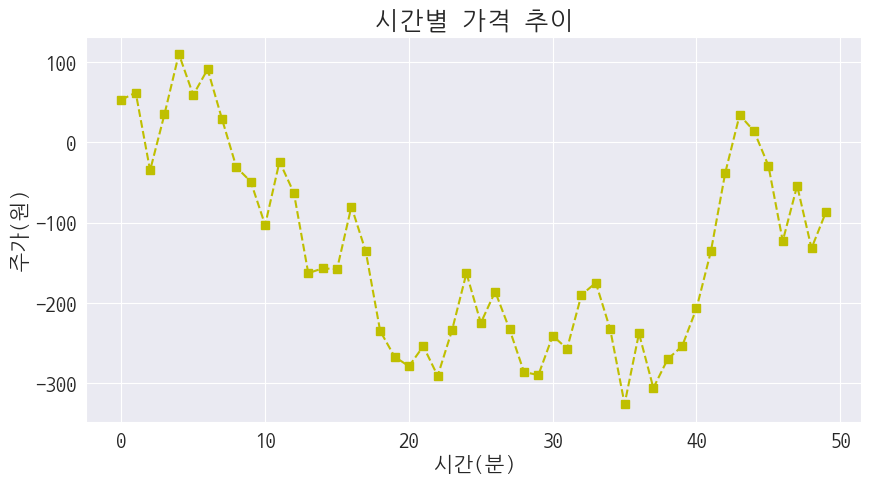

In [15]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(50), data, linestyle='--', marker='s', color='y')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('주가(원)')
plt.show()

In [4]:
# 2-2
# rcParams 대신 FontProperties의 plt.rc를 사용하는 방법
font = '/Users/kyle/Library/Fonts/NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=font, size=15).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothicCoding


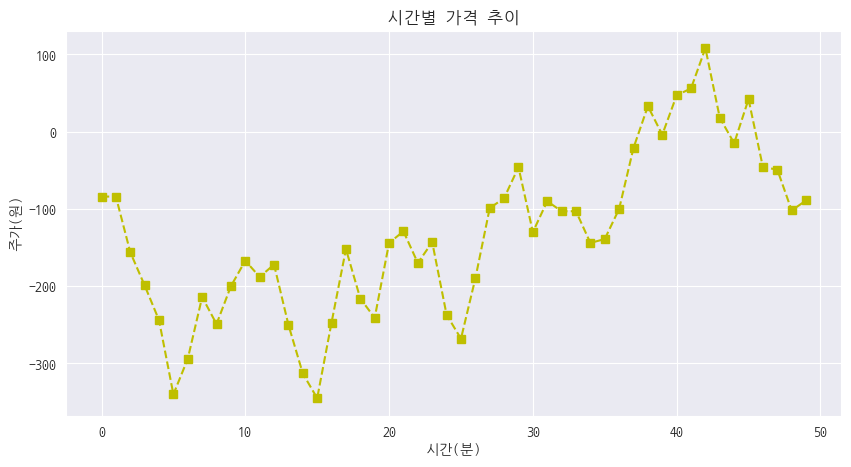

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(50), data, linestyle='--', marker='s', color='y')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('주가(원)')
plt.show()

3. 폰트 설정 정보를 matplotlib 설정 파일에 직접 넣어준다. → 그래프의 폰트가 필요한 컴퓨터마다 지정해야 한다.

In [4]:
# mpl.matplotlib_fname()을 실행하면 출력되는 경로의 파일을 수정한다.
print(mpl.matplotlib_fname())
#font.family:  sans-serif   → NanumGothicCoding
#font.size:    10.0         → 15.0

/opt/homebrew/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


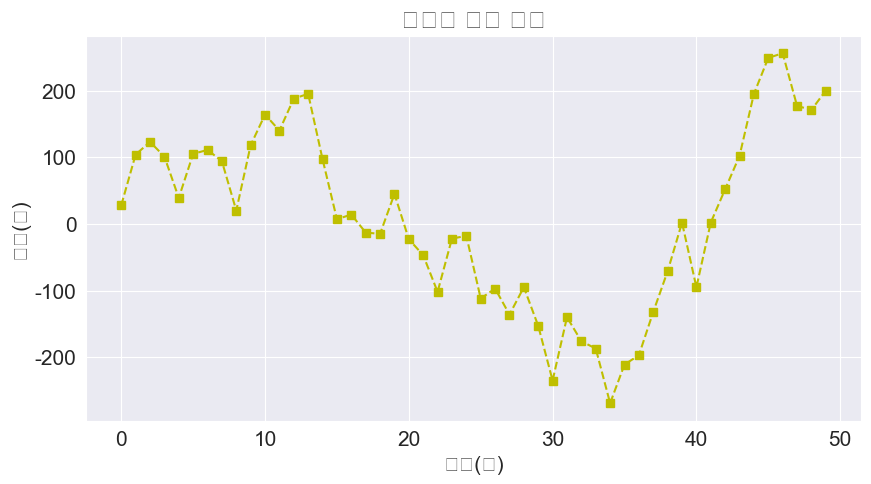

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(50), data, linestyle='--', marker='s', color='y')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('주가(원)')
plt.show()